In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 보스턴 주택 가격 데이터 셋

from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
# Standard Scaling (데이터의 평균이 0, 표준편차 1) : 데이터의 크기를 맞춰서 특정 데이터가 다른 데이터에 영향을 미치지 않게 Scaling한다.
mean = train_data.mean(axis = 0)

In [7]:
train_data = train_data - mean 

In [8]:
std = train_data.std(axis = 0)

In [9]:
train_data = train_data / std

In [10]:
mean = test_data.mean(axis = 0)
test_data = test_data - mean
std = test_data.std(axis = 0)
test_data = test_data / std

In [11]:
# 신경망을 만든다
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mae'])

    return model

In [19]:
# K-folder 검증
k = 4

num_val_samples = len(train_data) // k # num_val_samples = 101 --> 폴더의 사이즈
all_scores = []

for i in range(k):
    print('처리중인 폴드 #', i)

    #검증 데이터를 준비 : k번째 분할
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
    
    #훈련 데이터의 준비:
    partial_train_data = np.concatenate(
    [train_data[: i * num_val_samples],
    train_data[(i+1) * num_val_samples :]], axis = 0)

    partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1) * num_val_samples :]], axis = 0)

    model = build_model()
    model.fit(partial_train_data, partial_train_labels, epochs = 20, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [16]:
all_scores

[2.399334669113159, 2.704845666885376, 2.3964855670928955, 2.692615270614624]

In [18]:
np.mean(all_scores)

2.5483202934265137

In [20]:
# K-folder 검증
k = 4
num_epochs = 500

num_val_samples = len(train_data) // k # num_val_samples = 101 --> 폴더의 사이즈
all_scores = []

for i in range(k):
    print('처리중인 폴드 #', i)

    #검증 데이터를 준비 : k번째 분할
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]
    
    #훈련 데이터의 준비:
    partial_train_data = np.concatenate(
    [train_data[: i * num_val_samples],
    train_data[(i+1) * num_val_samples :]], axis = 0)

    partial_train_labels = np.concatenate(
    [train_labels[: i * num_val_samples],
    train_labels[(i+1) * num_val_samples :]], axis = 0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels, epochs = num_epochs, batch_size=1, validation_data = (val_data, val_labels), verbose=0)
    
    mae_history = history.history['mae']
    all_scores.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [26]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

Text(0, 0.5, 'Vallidaation MAE')

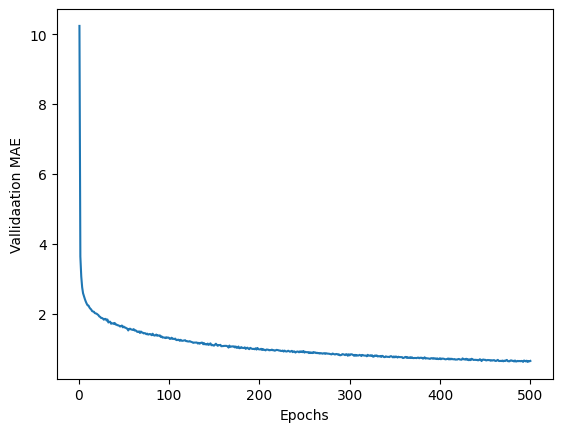

In [27]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Vallidaation MAE')